# **TUMOUR STAGE CLASSIFICATION MODEL**

# **Importing Packages**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# **Data Collection**

In [6]:
# importing dataset to model
df=pd.read_csv("BRCA_3.csv")
df

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.27368,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.42032,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,9-Nov-18,Dead
2,TCGA-A8-A079,69,FEMALE,0.21398,1.3114,-0.32747,-0.23426,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,8-Sep-17,9-Jun-18,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.34509,-0.21147,-0.19304,0.12427,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.22155,1.9068,0.52045,-0.31199,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,6-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,TCGA-AN-A04A,36,FEMALE,0.2318,0.61804,-0.55779,-0.51735,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,9-Feb-20,Dead
10005,TCGA-A8-A085,44,MALE,0.73272,1.1117,-0.26952,-0.35492,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,1-Nov-19,4-Mar-20,Dead
10006,TCGA-A1-A0SG,61,FEMALE,-0.71947,2.5485,-0.15024,0.33968,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
10007,TCGA-A2-A0EU,79,FEMALE,0.4794,2.0559,-0.53136,-0.18848,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead


In [8]:
df.shape

(10009, 16)

In [10]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.27368,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.42032,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,9-Nov-18,Dead
2,TCGA-A8-A079,69,FEMALE,0.21398,1.3114,-0.32747,-0.23426,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,8-Sep-17,9-Jun-18,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.34509,-0.21147,-0.19304,0.12427,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.22155,1.9068,0.52045,-0.31199,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,6-May-17,27-Jun-19,Dead


# **Data Analysis**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Patient_ID          10009 non-null  object
 1   Age                 10009 non-null  object
 2   Gender              10009 non-null  object
 3   Protein1            10009 non-null  object
 4   Protein2            10009 non-null  object
 5   Protein3            10009 non-null  object
 6   Protein4            10009 non-null  object
 7   Tumour_Stage        10009 non-null  object
 8   Histology           10009 non-null  object
 9   ER status           10009 non-null  object
 10  PR status           10009 non-null  object
 11  HER2 status         10009 non-null  object
 12  Surgery_type        10009 non-null  object
 13  Date_of_Surgery     10009 non-null  object
 14  Date_of_Last_Visit  9500 non-null   object
 15  Patient_Status      9620 non-null   object
dtypes: object(16)
memory u

In [15]:
df.describe(include="all")

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
count,10009,10009,10009,10009,10009,10009,10009,10009,10009,10009,10009,10009,10009,10009,9500,9620
unique,335,58,3,334,335,335,334,4,4,2,2,3,5,182,286,3
top,TCGA-D8-A1XD,59,FEMALE,0,0.42638,0.54715,-0.3507,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,6-Dec-18,20-Feb-20,Alive
freq,30,450,9886,60,30,30,60,5663,6979,10006,10006,9138,3144,150,90,7639


In [17]:
# Finding the sum of all null values
df.isnull().sum()

Patient_ID              0
Age                     0
Gender                  0
Protein1                0
Protein2                0
Protein3                0
Protein4                0
Tumour_Stage            0
Histology               0
ER status               0
PR status               0
HER2 status             0
Surgery_type            0
Date_of_Surgery         0
Date_of_Last_Visit    509
Patient_Status        389
dtype: int64

In [19]:
# Dropping the null values
df=df.dropna()
df.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9500 entries, 0 to 10008
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Patient_ID          9500 non-null   object
 1   Age                 9500 non-null   object
 2   Gender              9500 non-null   object
 3   Protein1            9500 non-null   object
 4   Protein2            9500 non-null   object
 5   Protein3            9500 non-null   object
 6   Protein4            9500 non-null   object
 7   Tumour_Stage        9500 non-null   object
 8   Histology           9500 non-null   object
 9   ER status           9500 non-null   object
 10  PR status           9500 non-null   object
 11  HER2 status         9500 non-null   object
 12  Surgery_type        9500 non-null   object
 13  Date_of_Surgery     9500 non-null   object
 14  Date_of_Last_Visit  9500 non-null   object
 15  Patient_Status      9500 non-null   object
dtypes: object(16)
memory usage: 

In [23]:
# dropping duplicate values in dataset
df.drop_duplicates()
df.shape

(9500, 16)

In [25]:
# dropping unwanted columns from dataset

df.drop("Date_of_Surgery",axis=1,inplace=True)
df.drop("Date_of_Last_Visit",axis=1,inplace=True)
df.drop("Patient_ID",axis=1,inplace=True)
df.drop("Surgery_type",axis=1,inplace=True)
df.drop("Patient_Status",axis=1,inplace=True)


C:\Users\cp\AppData\Local\Temp\ipykernel_14296\657304436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Date_of_Surgery",axis=1,inplace=True)
C:\Users\cp\AppData\Local\Temp\ipykernel_14296\657304436.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Date_of_Last_Visit",axis=1,inplace=True)
C:\Users\cp\AppData\Local\Temp\ipykernel_14296\657304436.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Patien

In [27]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status
0,36,FEMALE,0.080353,0.42638,0.54715,0.27368,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative
1,43,FEMALE,-0.42032,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative
2,69,FEMALE,0.21398,1.3114,-0.32747,-0.23426,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative
3,56,FEMALE,0.34509,-0.21147,-0.19304,0.12427,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative
4,56,FEMALE,0.22155,1.9068,0.52045,-0.31199,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative
...,...,...,...,...,...,...,...,...,...,...,...
10004,36,FEMALE,0.2318,0.61804,-0.55779,-0.51735,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive
10005,44,MALE,0.73272,1.1117,-0.26952,-0.35492,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative
10006,61,FEMALE,-0.71947,2.5485,-0.15024,0.33968,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative
10007,79,FEMALE,0.4794,2.0559,-0.53136,-0.18848,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive


In [29]:
df.shape

(9500, 11)

In [31]:
df['Tumour_Stage'].value_counts().head(50)

Tumour_Stage
II              5393
III             2306
I               1798
Tumour_Stage       3
Name: count, dtype: int64

# **Data Filtering**

In [34]:
# converting values to integer
df = df[pd.to_numeric(df["Age"], errors='coerce').notnull()]

df["Age"]=df["Age"].astype(int)

C:\Users\cp\AppData\Local\Temp\ipykernel_14296\2000255378.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"]=df["Age"].astype(int)


In [36]:
df.groupby("Age")
df  # arranged it according to age

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status
0,36,FEMALE,0.080353,0.42638,0.54715,0.27368,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative
1,43,FEMALE,-0.42032,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative
2,69,FEMALE,0.21398,1.3114,-0.32747,-0.23426,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative
3,56,FEMALE,0.34509,-0.21147,-0.19304,0.12427,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative
4,56,FEMALE,0.22155,1.9068,0.52045,-0.31199,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative
...,...,...,...,...,...,...,...,...,...,...,...
10004,36,FEMALE,0.2318,0.61804,-0.55779,-0.51735,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive
10005,44,MALE,0.73272,1.1117,-0.26952,-0.35492,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative
10006,61,FEMALE,-0.71947,2.5485,-0.15024,0.33968,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative
10007,79,FEMALE,0.4794,2.0559,-0.53136,-0.18848,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive


In [38]:
# Creating dummy columns from histology column
df = pd.get_dummies(df, columns=['Histology'], prefix='Histology')

In [40]:
# Renaming columns
df = df.rename(columns={'Histology_Infiltrating Ductal Carcinoma':'Histology_Infiltrating_Ductal_Carcinoma'})
df = df.rename(columns={'Histology_Infiltrating Lobular Carcinoma':'Histology_Infiltrating_Lobular_Carcinoma'})
df = df.rename(columns={'Histology_Mucinous Carcinoma':'Histology_Mucinous_Carcinoma'})
df = df.rename(columns={'ER status':'ER_status'})
df = df.rename(columns={'PR status':'PR_status'})
df = df.rename(columns={'HER2 status':'HER2_status'})

In [42]:
# Converting object type to float type or int
df.groupby("Age")

df["Tumour_Stage"] = np.where(df.Tumour_Stage == 'II', 2,
                        np.where(df.Tumour_Stage== 'III',3,
                        np.where(df.Tumour_Stage== 'I', 1,
                        np.nan)))  # You can choose to use np.nan or another default value for cases that don't match

df["Gender"] = np.where(df.Gender == 'FEMALE', 1,
                        np.where(df.Gender== 'MALE', 0,
                        np.nan))

df["ER_status"] = np.where(df.ER_status == 'Positive',1,
                           np.where(df.ER_status == 'Negative',0,
                                    np.nan))

df["PR_status"] = np.where(df.PR_status == 'Positive',1,
                           np.where(df.PR_status == 'Negative',0,
                                    np.nan))

df["HER2_status"] = np.where(df.HER2_status == 'Positive',1,
                           np.where(df.HER2_status == 'Negative',0,
                                    np.nan))
# converting different datatypes to int type
df['Histology_Infiltrating_Ductal_Carcinoma'] = df['Histology_Infiltrating_Ductal_Carcinoma'].astype(int)
df['Histology_Infiltrating_Lobular_Carcinoma'] = df['Histology_Infiltrating_Lobular_Carcinoma'].astype(int)
df['Histology_Mucinous_Carcinoma'] = df['Histology_Mucinous_Carcinoma'].astype(int)
df['Tumour_Stage'] = df['Tumour_Stage'].astype(int)
df['Gender'] = df['Gender'].astype(int)
df['ER_status'] = df['ER_status'].astype(int)
df['PR_status'] = df['PR_status'].astype(int)
df['HER2_status'] = df['HER2_status'].astype(int)

# rearranging the columns
new_cols = ["Age","Gender","Protein1","Protein2","Protein3","Protein4","ER_status","PR_status","HER2_status","Histology_Infiltrating_Ductal_Carcinoma","Histology_Infiltrating_Lobular_Carcinoma","Histology_Mucinous_Carcinoma","Tumour_Stage"]
df = df[new_cols]
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,ER_status,PR_status,HER2_status,Histology_Infiltrating_Ductal_Carcinoma,Histology_Infiltrating_Lobular_Carcinoma,Histology_Mucinous_Carcinoma,Tumour_Stage
0,36,1,0.080353,0.42638,0.54715,0.27368,1,1,0,1,0,0,3
1,43,1,-0.42032,0.57807,0.61447,-0.031505,1,1,0,0,0,1,2
2,69,1,0.21398,1.3114,-0.32747,-0.23426,1,1,0,1,0,0,3
3,56,1,0.34509,-0.21147,-0.19304,0.12427,1,1,0,1,0,0,2
4,56,1,0.22155,1.9068,0.52045,-0.31199,1,1,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,36,1,0.2318,0.61804,-0.55779,-0.51735,1,1,1,1,0,0,3
10005,44,0,0.73272,1.1117,-0.26952,-0.35492,1,1,0,0,1,0,2
10006,61,1,-0.71947,2.5485,-0.15024,0.33968,1,1,0,1,0,0,2
10007,79,1,0.4794,2.0559,-0.53136,-0.18848,1,1,1,1,0,0,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9497 entries, 0 to 10008
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Age                                       9497 non-null   int32 
 1   Gender                                    9497 non-null   int32 
 2   Protein1                                  9497 non-null   object
 3   Protein2                                  9497 non-null   object
 4   Protein3                                  9497 non-null   object
 5   Protein4                                  9497 non-null   object
 6   ER_status                                 9497 non-null   int32 
 7   PR_status                                 9497 non-null   int32 
 8   HER2_status                               9497 non-null   int32 
 9   Histology_Infiltrating_Ductal_Carcinoma   9497 non-null   int32 
 10  Histology_Infiltrating_Lobular_Carcinoma  9497 non-n

# **Data Visualisation**

AttributeError: 'numpy.int32' object has no attribute 'startswith'

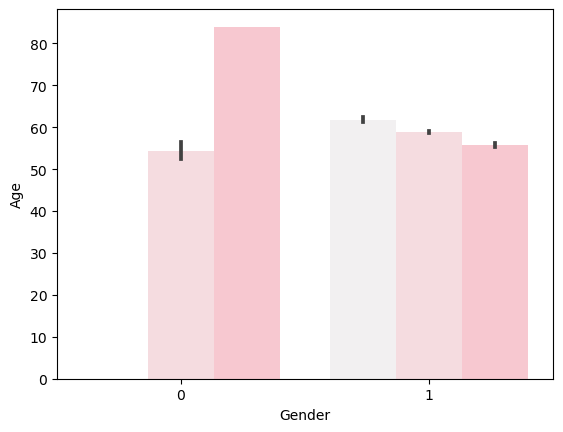

In [47]:
 #Classifying tumour stages on the basis of age and gender

sns.barplot(y="Age",x="Gender",color="pink",hue="Tumour_Stage",data=df)

C:\Users\cp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


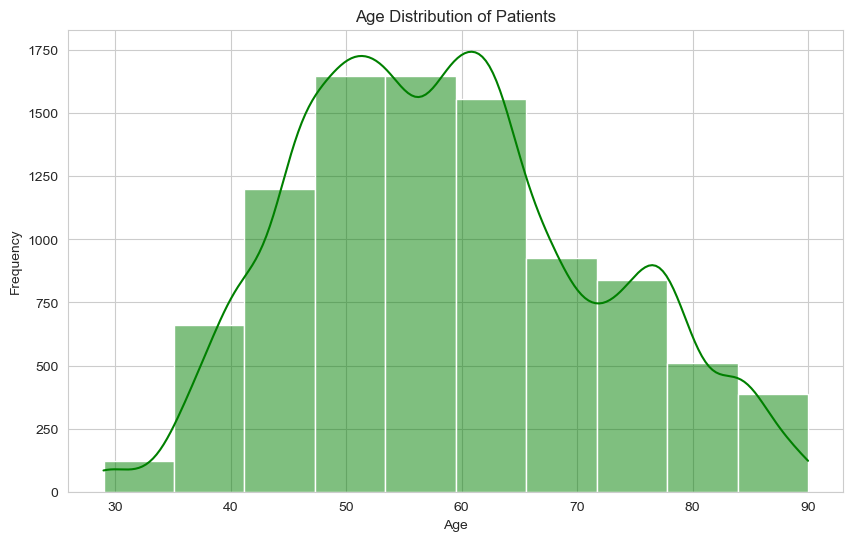

In [55]:
# set the background style to plot
sns.set_style('whitegrid')

# Plotting histogram for age
plt.figure(figsize=(10,6))
sns.histplot(df['Age'],kde = True, color='green',bins = 10)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [57]:
# correlation table

correlation= df[['Age','Protein1','Protein2','Protein3','Protein4','HER2_status','Histology_Infiltrating_Ductal_Carcinoma','Histology_Infiltrating_Lobular_Carcinoma','Histology_Mucinous_Carcinoma']].corr()
correlation

,Age,Protein1,Protein2,Protein3,Protein4,HER2_status,Histology_Infiltrating_Ductal_Carcinoma,Histology_Infiltrating_Lobular_Carcinoma,Histology_Mucinous_Carcinoma
Age,1.000000,-0.044741,-0.011117,-0.046993,0.095637,-0.068442,0.114358,-0.104327,-0.034390
Protein1,-0.044741,1.000000,0.223217,-0.103151,0.259320,-0.034040,-0.048660,0.018575,0.073606
Protein2,-0.011117,0.223217,1.000000,-0.408445,0.084691,-0.014323,-0.040188,0.067454,-0.058250
Protein3,-0.046993,-0.103151,-0.408445,1.000000,0.076636,-0.018365,0.052111,-0.080878,0.060482
Protein4,0.095637,0.259320,0.084691,0.076636,1.000000,0.004386,0.001093,-0.022255,0.048229
HER2_status,-0.068442,-0.034040,-0.014323,-0.018365,0.004386,1.000000,0.012690,-0.010816,-0.005554
Histology_Infiltrating_Ductal_Carcinoma,0.114358,-0.048660,-0.040188,0.052111,0.001093,0.012690,1.000000,-0.909134,-0.307916
Histology_Infiltrating_Lobular_Carcinoma,-0.104327,0.018575,0.067454,-0.080878,-0.022255,-0.010816,-0.909134,1.000000,-0.116331
Histology_Mucinous_Carcinoma,-0.034390,0.073606,-0.058250,0.060482,0.048229,-0.005554,-0.307916,-0.116331,1.000000


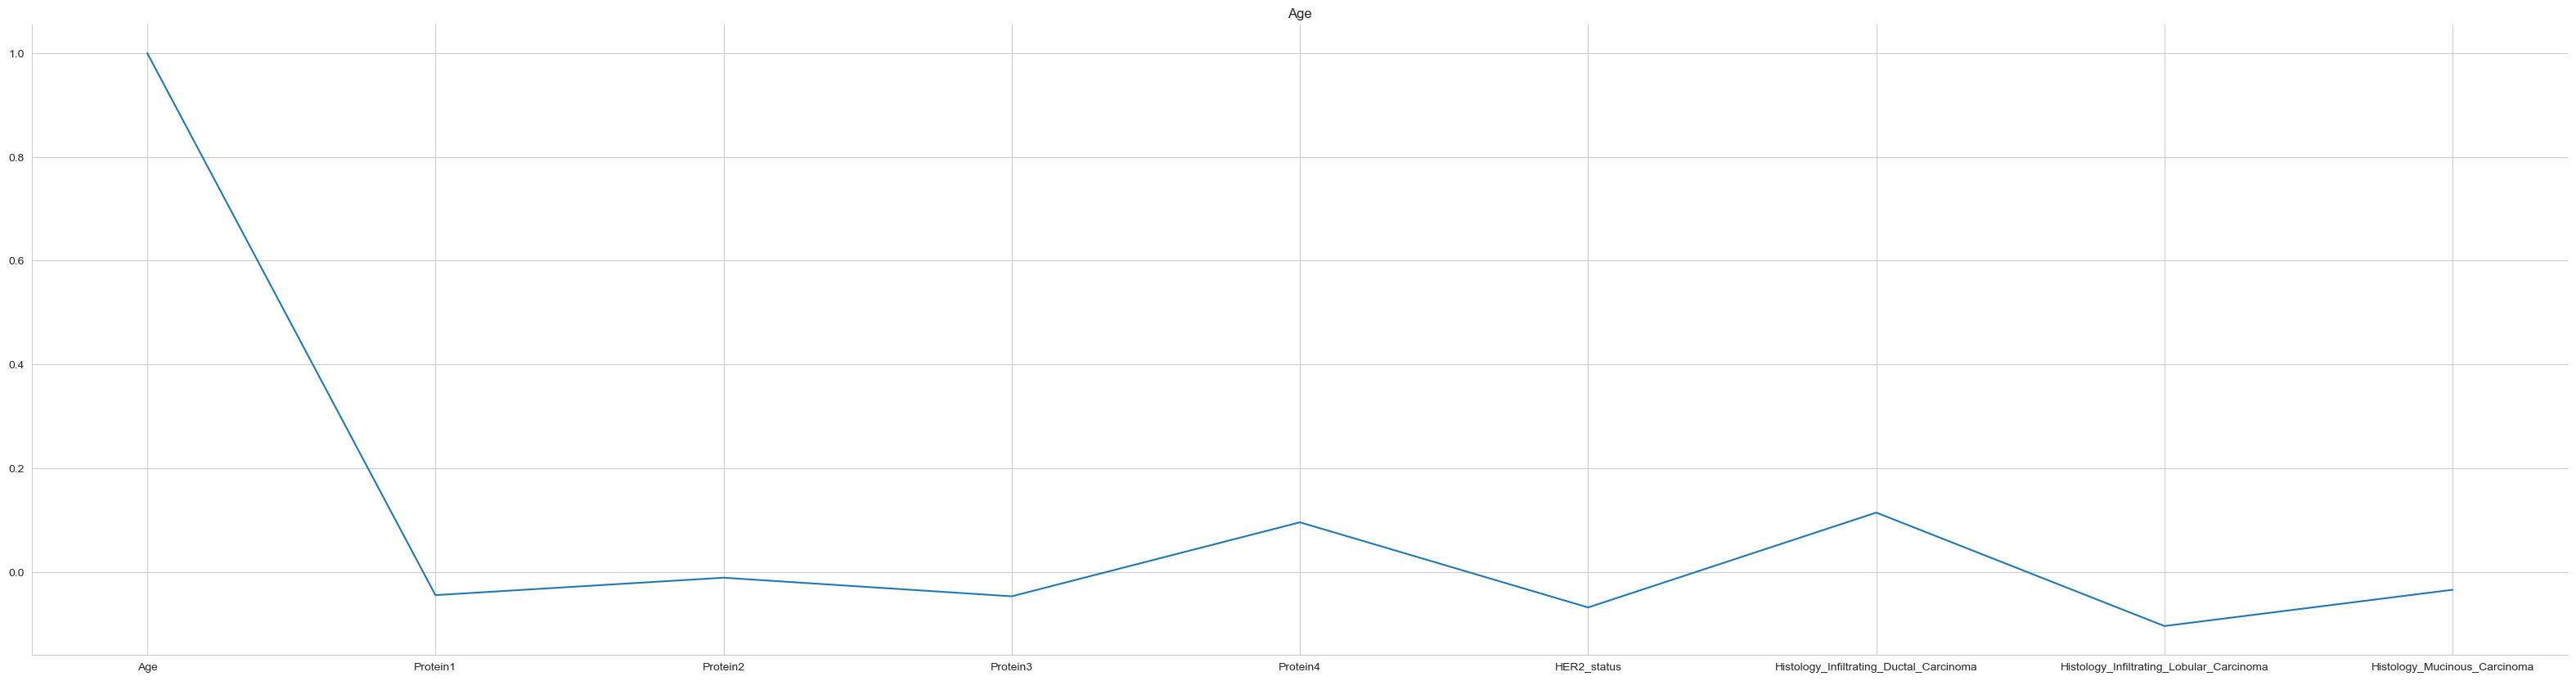

In [59]:
correlation['Age'].plot(kind='line', figsize=(40,10), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)


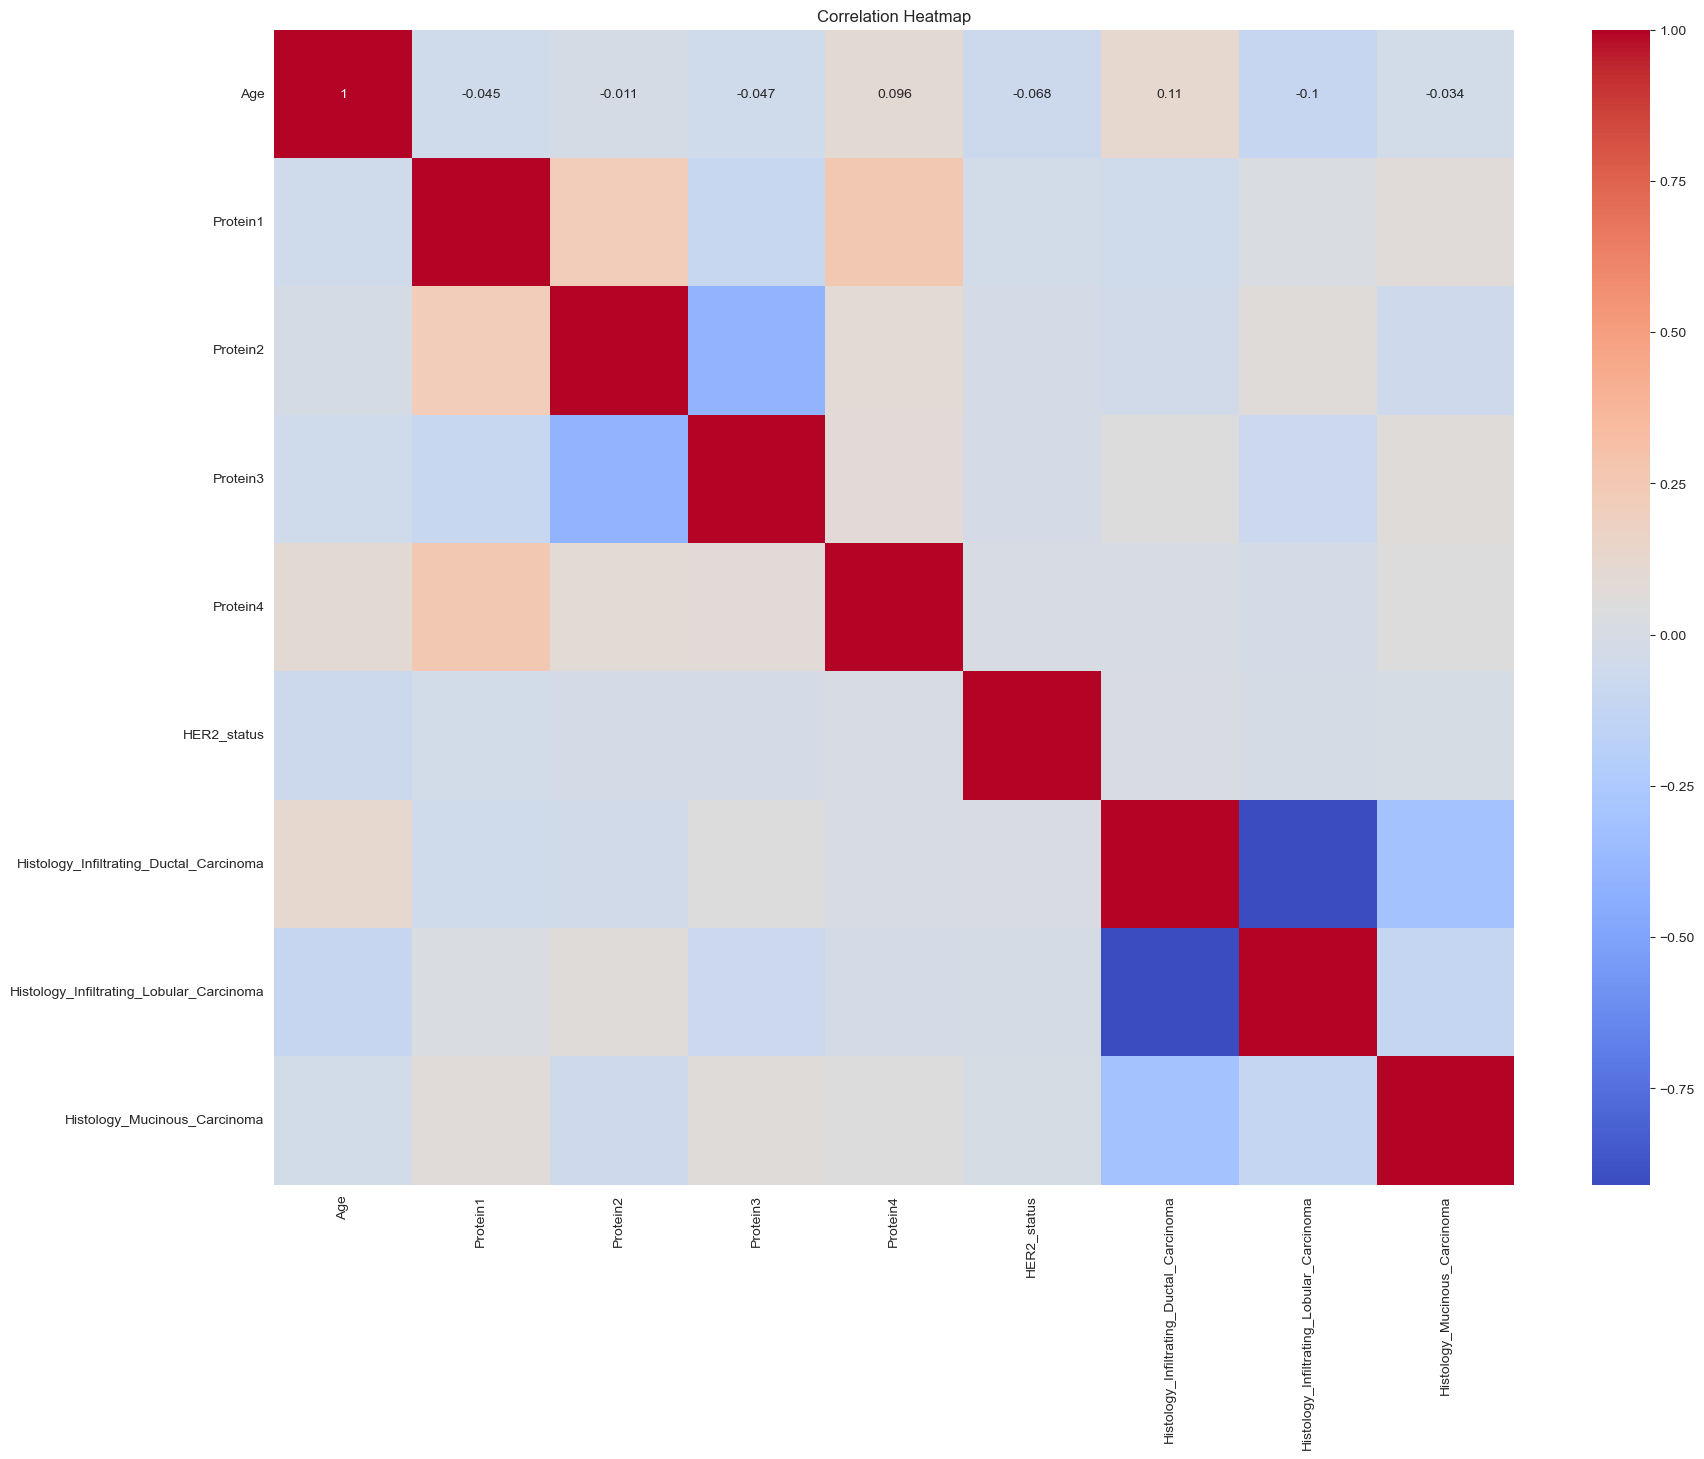

In [61]:
# correlation graph

plt.figure(figsize=(20,15))
sns.heatmap(correlation, annot=True ,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Model Implementation**

In [64]:
# input
x = df.iloc[:, :-1].values

# output
y = df.iloc[:,-1].values

In [66]:
x,y

(array([[36, 1, '0.080353', ..., 1, 0, 0],
        [43, 1, '-0.42032', ..., 0, 0, 1],
        [69, 1, '0.21398', ..., 1, 0, 0],
        ...,
        [61, 1, '-0.71947', ..., 1, 0, 0],
        [79, 1, '0.4794', ..., 1, 0, 0],
        [76, 1, '-0.24427', ..., 1, 0, 0]], dtype=object),
 array([3, 2, 3, ..., 2, 1, 1]))

In [68]:
# feature selection
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(x,y)
print(X_new)

[[36 0 1 0 0]
 [43 0 0 0 1]
 [69 0 1 0 0]
 ...
 [61 0 1 0 0]
 [79 1 1 0 0]
 [76 0 1 0 0]]


C:\Users\cp\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [6 7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\cp\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [70]:
feature_names = df.columns[:-1]
# Get the mask of selected features
selected_mask = selector.get_support()

# Get the names of the selected features
selected_features = [feature for feature, selected in zip(feature_names, selected_mask) if selected]

print("Top 5 important features based on ANOVA F-test:")
print(selected_features)

Top 5 important features based on ANOVA F-test:
['Age', 'HER2_status', 'Histology_Infiltrating_Ductal_Carcinoma', 'Histology_Infiltrating_Lobular_Carcinoma', 'Histology_Mucinous_Carcinoma']


In [72]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_new)
scaled_features

array([[-1.77357404, -0.31716089,  0.64464035, -0.58606441, -0.19849494],
       [-1.22712359, -0.31716089, -1.55125256, -0.58606441,  5.03791182],
       [ 0.80254953, -0.31716089,  0.64464035, -0.58606441, -0.19849494],
       ...,
       [ 0.17803472, -0.31716089,  0.64464035, -0.58606441, -0.19849494],
       [ 1.58319303,  3.15297387,  0.64464035, -0.58606441, -0.19849494],
       [ 1.34899998, -0.31716089,  0.64464035, -0.58606441, -0.19849494]])

In [74]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,test_size=0.2,random_state=0)

# Classification algorithms
classifiers = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Machine' : SVC(),
    'Naive Bayes' : GaussianNB(),
    'K-Nearest Neighbors' : KNeighborsClassifier()

}

In [76]:
# Training and evaluating classifiers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

results = {}
for name, clf in classifiers.items():
  clf.fit(X_train, y_train)
  y_pred_train = clf.predict(X_train)
  y_pred_test = clf.predict(X_test)
  cm = confusion_matrix(y_test, y_pred_test)
  print(f"Confusion Matrix for {name}: \n", cm)
  accuracy_train = accuracy_score(y_train, y_pred_train)
  accuracy_test = accuracy_score(y_test, y_pred_test)
  results[name] = accuracy_test

  print(f'{name} Accuracy of training data: {accuracy_train *100:.2f}%')
  print(f'{name} Accuracy of testing data: {accuracy_test *100:.2f}%')
  print(classification_report(y_test, y_pred_test))
  print('...................................................................')

Confusion Matrix for Logistic Regression: 
 [[   0  331    7]
 [   0 1046   29]
 [   0  458   29]]
Logistic Regression Accuracy of training data: 56.44%
Logistic Regression Accuracy of testing data: 56.58%
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       338
           2       0.57      0.97      0.72      1075
           3       0.45      0.06      0.11       487

    accuracy                           0.57      1900
   macro avg       0.34      0.34      0.27      1900
weighted avg       0.44      0.57      0.43      1900

...................................................................
Confusion Matrix for Decision Tree: 
 [[160 144  34]
 [106 899  70]
 [ 50 192 245]]
Decision Tree Accuracy of training data: 71.95%
Decision Tree Accuracy of testing data: 68.63%
              precision    recall  f1-score   support

           1       0.51      0.47      0.49       338
           2       0.73      0.84      0.78      1075
   

C:\Users\cp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix for Random Forest: 
 [[149 152  37]
 [ 94 919  62]
 [ 40 208 239]]
Random Forest Accuracy of training data: 71.92%
Random Forest Accuracy of testing data: 68.79%
              precision    recall  f1-score   support

           1       0.53      0.44      0.48       338
           2       0.72      0.85      0.78      1075
           3       0.71      0.49      0.58       487

    accuracy                           0.69      1900
   macro avg       0.65      0.60      0.61      1900
weighted avg       0.68      0.69      0.68      1900

...................................................................
Confusion Matrix for Support Vector Machine: 
 [[   5  333    0]
 [   0 1066    9]
 [   0  435   52]]
Support Vector Machine Accuracy of training data: 59.75%
Support Vector Machine Accuracy of testing data: 59.11%
              precision    recall  f1-score   support

           1       1.00      0.01      0.03       338
           2       0.58      0.99      0.73     

In [79]:
# Finding the best classifier
best_classifier = max(results, key=results.get)
print(f'Best Classifier: {best_classifier} with Accuracy: {results[best_classifier]:.4f}')

Best Classifier: Random Forest with Accuracy: 0.6879


# **XGBoost Classification Model**

In [83]:
# importing XGBoost

!pip install xgboost

In [84]:
# adjusting test set labels

y_train = y_train - 1
y_test = y_test - 1

In [85]:
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [92]:
#predicting  the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)*100
acc_test_xgb = accuracy_score(y_test,y_test_xgb)*100

print("XGBoost: Accuracy on training data : {:.3f}".format(acc_train_xgb))
print("XGBoost: Accuracy on test data : {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training data : 71.949
XGBoost: Accuracy on test data : 68.632


# **Comparing Different Models**

In [95]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

In [97]:
# Define the list of models names
ML_Model = ['Logistic Regression','Decision Tree','Random Forest','Support Vector Machine','Naive Bayes','K-Nearest Neighbors','XGBoost Model']

# List of accuracy of training model
acc_train = [56.44,71.95,71.94,59.75,27.05,66.50,71.949]

# List of accuracy of testing model
acc_test = [55.58,68.63,63.68,59.11,29.00,55.16,68.632]

In [99]:
#Creating dataframe
data = pd.DataFrame({'ML Model': ML_Model,
                     'Training Accuracy': acc_train,
                     'Testing Accuracy': acc_test})
data

,ML Model,Training Accuracy,Testing Accuracy
0,Logistic Regression,56.440,55.580
1,Decision Tree,71.950,68.630
2,Random Forest,71.940,63.680
3,Support Vector Machine,59.750,59.110
4,Naive Bayes,27.050,29.000
5,K-Nearest Neighbors,66.500,55.160
6,XGBoost Model,71.949,68.632


# **Random Forest Classifier**

In [102]:
# Train the Decision Tree Model

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [104]:
# Check the Model Performance

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.69


In [106]:
#predicting the target value from the model for the samples
y_test_tree = model.predict(X_test)
y_train_tree = model.predict(X_train)

#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.719
Decision Tree: Accuracy on test Data: 0.686


In [108]:
print("Shape of X_train:", X_train.shape)
print(X_train)

Shape of X_train: (7597, 5)
[[ 0.56835648 -0.31716089 -1.55125256  1.70629709 -0.19849494]
 [ 0.33416342  3.15297387  0.64464035 -0.58606441 -0.19849494]
 [ 0.02190602 -0.31716089 -1.55125256  1.70629709 -0.19849494]
 ...
 [ 0.33416342 -0.31716089  0.64464035 -0.58606441 -0.19849494]
 [-0.13422268  3.15297387  0.64464035 -0.58606441 -0.19849494]
 [ 1.19287128 -0.31716089 -1.55125256  1.70629709 -0.19849494]]


# **Deploying Model Using Gradio**

In [111]:
!pip install gradio scikit-learn pandas

In [120]:
import gradio as gr

# Define a function to make predictions using the trained model
def predict_stage(age,HER2_status,Histology_Infiltrating_Ductal_Carcinoma,Histology_Infiltrating_Lobular_Carcinoma,Histology_Mucinous_Carcinoma):
    features = [[age,HER2_status,Histology_Infiltrating_Ductal_Carcinoma,Histology_Infiltrating_Lobular_Carcinoma,Histology_Mucinous_Carcinoma]]
    prediction = xgb.predict(features)[0] # 0 - Stage1, 1- Stage2, 2- Stage3
    return f"Predicted Tumor Stage: {prediction}"

# Create a Gradio interface
iface = gr.Interface(
    fn=predict_stage,
    inputs=[
        gr.Slider(minimum=0, maximum=100, step=1, label="Age"),
        gr.Number(label="HER2_status"),
        gr.Number(label="Histology_Infiltrating_Ductal_Carcinoma"),
        gr.Number(label="Histology_Infiltrating_Lobular_Carcinoma"),
        gr.Number(label="Histology_Mucinous_Carcinoma")
    ],
    outputs="text",
    title="Tumor Stage Classification",
    description="Enter the features to predict the tumor stage."
)

# Launch the interface
iface.launch()


Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.
